In [101]:
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as pyplot
# seaborn for making statistical graphics in Python
import seaborn as sns 

from collections import Counter

#StandardScalre - Standardize features by removing the mean and scaling to unit variance
# LabelEncoder - converts each string value into a number
from sklearn.preprocessing import StandardScaler, LabelEncoder
# metrics implements functions assessing prediction error for specific purposes.
# includes score functions, performance metrics and pairwise metrics and distance computations.
from sklearn import metrics
from sklearn import svm

from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# # XGBoost - extreme gradient boosting
# import xgboost as xgb
# from xgboost import plot_importance
# # Light Gradient Boosting Machine - based on decision tree algorithms and used for ranking,
# # classification and other machine learning tasks
# import lightgbm as lgb
# from catboost import Pool, CatBoostRegressor

# for computing
from scipy.stats import uniform, randint
from sklearn.utils.fixes import loguniform
# from statsmodels.stats.outliers_influence import variance_inflation_factor

In [102]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings("ignore")

###### Data pre-processing

In [103]:
# import the dataset
complete_condo_data = pd.read_csv('Rental-Contracts-Non-Landed-Housing-Dev - removedNA.csv')
complete_condo_data.columns

Index(['S/N', 'Building/Project Name', 'Street Name', 'Postal District',
       'Type', 'No. of Bedroom(for Non-Landed Only)', 'Monthly Gross Rent($)',
       'Floor Area (sq ft)', 'Lease Commencement Date'],
      dtype='object')

In [104]:
col_building = 'Building/Project Name'
col_street_name = 'Street Name'
col_postal_district = 'Postal District'
col_num_bedroom = 'No. of Bedroom(for Non-Landed Only)'
col_monthly_rent = 'Monthly Gross Rent($)'
col_floor_area = 'Floor Area (sq ft)'
col_lease_date = 'Lease Commencement Date'

In [105]:
columns_to_drop = ['S/N', 'Type']
valid_condo_data = complete_condo_data.drop(columns = columns_to_drop)
valid_condo_data.head()

,Building/Project Name,Street Name,Postal District,No. of Bedroom(for Non-Landed Only),Monthly Gross Rent($),Floor Area (sq ft),Lease Commencement Date
0,EMERALD PARK,INDUS ROAD,3,2,3200,900 to 1000,Feb-21
1,V ON SHENTON,SHENTON WAY,1,1,3700,700 to 800,Feb-21
2,MARINA BAY RESIDENCES,MARINA BOULEVARD,1,2,5850,1100 to 1200,Feb-21
3,THE TRILINQ,JALAN LEMPENG,5,1,2250,500 to 600,Feb-21
4,PEOPLE'S PARK COMPLEX,PARK ROAD,1,1,1800,400 to 500,Feb-21


In [106]:
#pd.unique(valid_condo_data[col_building])
# valid_condo_data[building].unique()

In [107]:
# convert unique string values with numerical values using Category
valid_condo_data_dummy = valid_condo_data.copy()

valid_condo_data_dummy[col_building] = pd.factorize(valid_condo_data_dummy[col_building])[0]
# valid_condo_data_dummy[col_building] = pd.Series(valid_condo_data_dummy[col_building])
valid_condo_data_dummy[col_building] = valid_condo_data_dummy[col_building].astype("category")

valid_condo_data_dummy[col_street_name] = pd.factorize(valid_condo_data_dummy[col_street_name])[0]
# valid_condo_data_dummy[col_street_name] = pd.Series(valid_condo_data_dummy[col_street_name])
valid_condo_data_dummy[col_street_name] = valid_condo_data_dummy[col_street_name].astype("category")

valid_condo_data_dummy[col_floor_area] = pd.factorize(valid_condo_data_dummy[col_floor_area])[0]
# valid_condo_data_dummy[col_floor_area] = pd.Series(valid_condo_data_dummy[col_floor_area])
valid_condo_data_dummy[col_floor_area] = valid_condo_data_dummy[col_floor_area].astype("category")

valid_condo_data_dummy[col_lease_date] = pd.factorize(valid_condo_data_dummy[col_lease_date])[0]
# valid_condo_data_dummy[col_lease_date] = pd.Series(valid_condo_data_dummy[col_lease_date])
valid_condo_data_dummy[col_lease_date] = valid_condo_data_dummy[col_lease_date].astype("category")




valid_condo_data_dummy.head()

,Building/Project Name,Street Name,Postal District,No. of Bedroom(for Non-Landed Only),Monthly Gross Rent($),Floor Area (sq ft),Lease Commencement Date
0,0,0,3,2,3200,0,0
1,1,1,1,1,3700,1,0
2,2,2,1,2,5850,2,0
3,3,3,5,1,2250,3,0
4,4,4,1,1,1800,4,0


In [108]:
# # convert unique string values with numerical values using LabelEncoder
# # Converting the non-numeric data to numeric
# # In order to train the K-Nearest Neighbor Classifier we must convert any string data into some kind of a number.
# #  sklearn has a method that can do this.

# valid_condo_data_dummy = valid_condo_data.copy()

# # Start by creating a label encoder object and then use
# # that to encode each column of data into integers
# le = LabelEncoder()

# # The method fit_transform() takes a list (each of the columns) and will return an array containing new values.
# building_name = le.fit_transform(list(valid_condo_data_dummy[col_building]))
# street_name = le.fit_transform(list(valid_condo_data_dummy[col_street_name]))
# postal_district = le.fit_transform(list(valid_condo_data_dummy[col_postal_district]))
# floor_area = le.fit_transform(list(valid_condo_data_dummy[col_floor_area]))
# lease_date = le.fit_transform(list(valid_condo_data_dummy[col_lease_date]))
# num_of_bedrooms = (list(valid_condo_data_dummy[col_num_bedroom]))
# monthly_rent = (list(valid_condo_data_dummy[col_monthly_rent]))

# # print(building_name)
# # print(street_name)
# # print(floor_area)
# # print(lease_date)
# # print(postal_district)

# # valid_condo_data_dummy.head()


In [109]:
# for i in range(len(valid_condo_data_dummy)):
#     print('--------------------------------------------------------------------------------')
#     print(valid_condo_data_dummy.iloc[i][col_building], valid_condo_data.iloc[i][col_building])


In [110]:
# Separate dependent(target or label) variable and independent (features) variables
# The target, also known as the label, is the value we want to predict and
# the features are all the columns the model uses to make a prediction. 
target = col_monthly_rent
X = valid_condo_data_dummy.drop([target], axis = 1) # features
# Saving feature names for later use
X_list = list(X.columns)
y = valid_condo_data_dummy[target] # label

In [111]:
# # Separate dependent(target or label) variable and independent (features) variables
# # The target, also known as the label, is the value we want to predict and
# # the features are all the columns the model uses to make a prediction. 
# target = col_monthly_rent
# # features
# X = list(zip(building_name, street_name, floor_area, 
#              lease_date, postal_district, num_of_bedrooms, monthly_rent)) 

# # label
# y = list(monthly_rent)


In [112]:
# Perform train test split - Splits data into training and testing sets.
# During training, let the model ‘see’ the answers, in this case the rent, so it can learn how to predict the rent from the features.
# Expecting that there is some relationship between all the features and the target value, 
# and the model’s job is to learn this relationship during training.
# Then, when it comes time to evaluate the model, we ask it to make predictions on a testing set where it only has access to the features 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)


In [113]:
X_train_original = X_train.copy()
X_test_original = X_test.copy()

In [114]:
# # Carry out standardization on numerical columns
# scaler = StandardScaler() 
# numerical_cols = [col_postal_district, col_num_bedroom]
# X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
# X_test[numerical_cols] = scaler.fit_transform(X_test[numerical_cols])

In [115]:
X_train.head()


,Building/Project Name,Street Name,Postal District,No. of Bedroom(for Non-Landed Only),Floor Area (sq ft),Lease Commencement Date
151044,964,276,15,3,8,0
318496,1885,668,23,3,8,1
369333,2001,719,27,3,0,47
124153,226,122,10,3,2,40
353897,1918,658,21,4,6,49


In [116]:
# Instantiate a Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)


LinearRegression()

In [117]:
y_pred_train = linear_reg.predict(X_train)
y_pred_test = linear_reg.predict(X_test)

In [118]:
# Model evaluation
print('R^2',metrics.r2_score(y_train, y_pred_train))
print('Adjusted R^2',1 - (1-metrics.r2_score(y_train, y_pred_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE',metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE',metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

R^2 0.5587648012275559
Adjusted R^2 0.5587568720691602
MAE 882.755559716841
MSE 1987406.8215413075
RMSE 1409.7541706061052


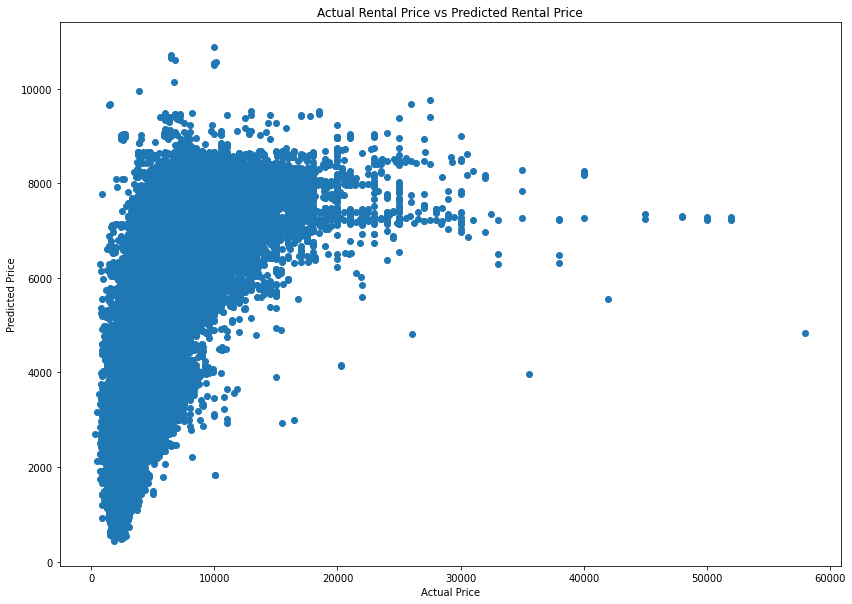

In [119]:
# Visualizing actual prices vs predicted values
pyplot.figure(figsize=[14, 10])
pyplot.scatter(y_train, y_pred_train)
pyplot.xlabel("Actual Price")
pyplot.ylabel("Predicted Price")
pyplot.title("Actual Rental Price vs Predicted Rental Price")
pyplot.show()

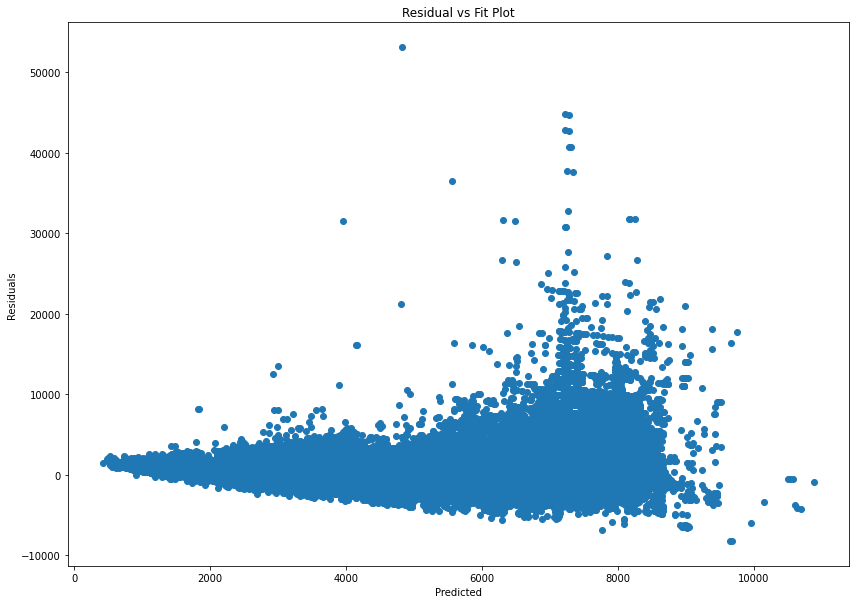

In [120]:
# Equal error variance
# Residual vs fit plot
# Residual plots can be used to analyse whether or not a linear regression model is appropriate for the data.
pyplot.figure(figsize=[14, 10])
pyplot.scatter(y_pred_train, y_train - y_pred_train)
pyplot.title("Residual vs Fit Plot")
pyplot.xlabel("Predicted")
pyplot.ylabel("Residuals")
pyplot.show()

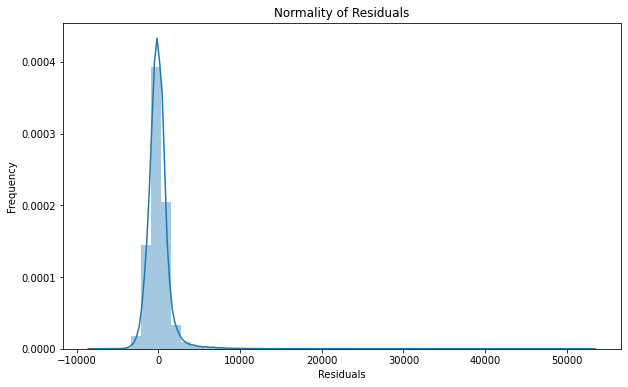

In [121]:
# Normality of residuals - Normal error
#  Since the residuals measure where the points fall in relation to
# the line, a symmetric distribution of the residuals indicates that the same number of points fall
# above and below the line. Since a residual of 0 means a point is right on the line, a mean of 0
# indicates the line is in the middle of the points. Once again, some are above and some are below.
# And the bell shape means that most are close to the line, and there are fewer points farther from
# the line.
pyplot.figure(figsize=[10, 6])
sns.distplot(y_train-y_pred_train)
pyplot.title("Normality of Residuals")
pyplot.xlabel("Residuals")
pyplot.ylabel("Frequency")
pyplot.show()

In [122]:
# # Display heatmap
# corrMatrix = X_train.corr()
# sns.heatmap(corrMatrix, annot=True)
# pyplot.show()

In [123]:
# Linearity
X.columns

Index(['Building/Project Name', 'Street Name', 'Postal District',
       'No. of Bedroom(for Non-Landed Only)', 'Floor Area (sq ft)',
       'Lease Commencement Date'],
      dtype='object')

In [124]:
# valid_condo_data_dummy[col_building].astype(str)
# np.asarray(valid_condo_data_dummy[col_building])
# # valid_condo_data_dummy.head()

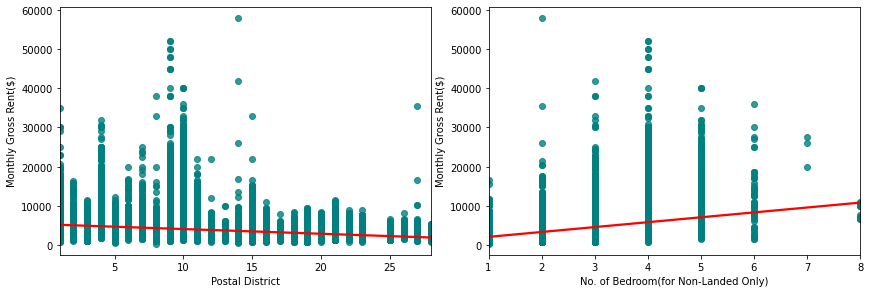

In [125]:
numerical_cols = [ col_postal_district, col_num_bedroom]
X_plot = X.loc[:,numerical_cols]
fig, axs = pyplot.subplots(ncols=len(numerical_cols), nrows=1, figsize=(12, 4))

axs = axs.flatten()
for i, k in enumerate(numerical_cols):
    sns.regplot(y=y, x=X_plot[k], ax=axs[i], scatter_kws={"color": "teal"}, line_kws={"color": "red"})
pyplot.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

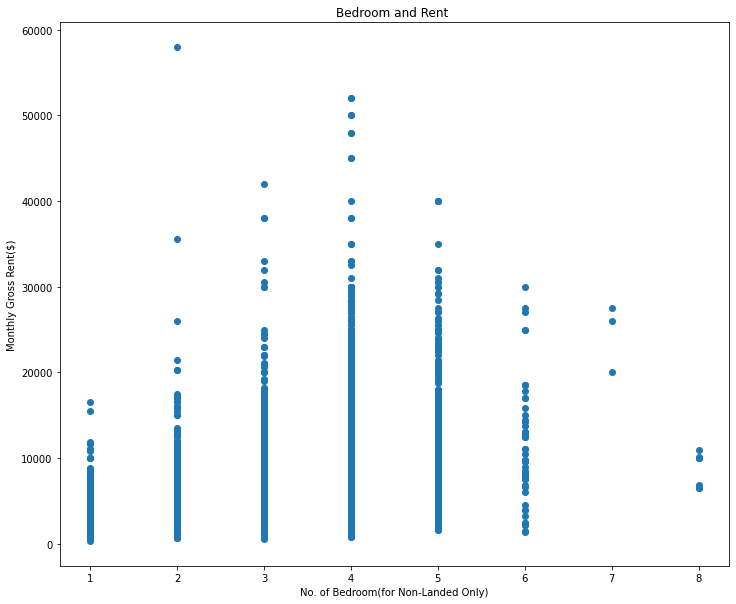

In [126]:
pyplot.figure(figsize=[12, 10])
pyplot.scatter(X_train[col_num_bedroom],y_train)
pyplot.title("Bedroom and Rent ")
pyplot.xlabel(col_num_bedroom)
pyplot.ylabel(col_monthly_rent)
pyplot.show()
# sns.despine

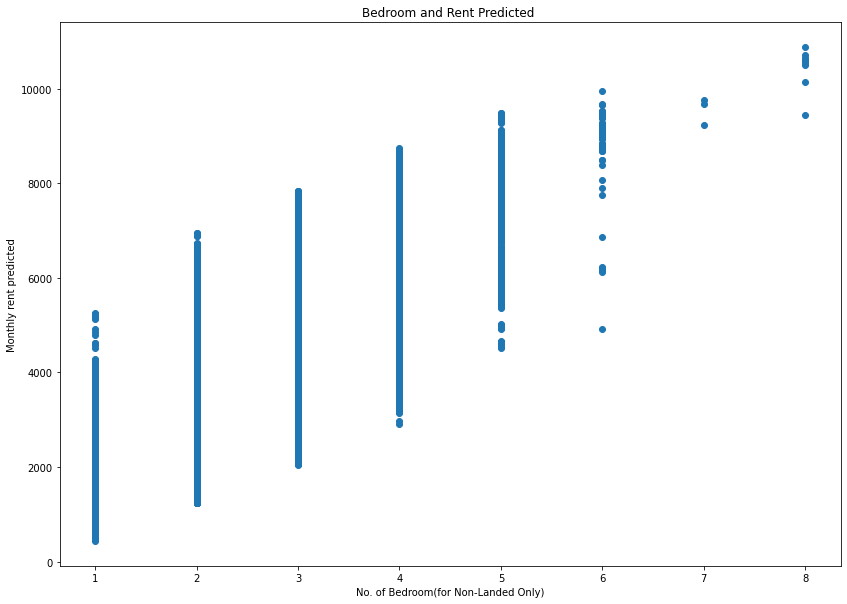

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [127]:
pyplot.figure(figsize=[14, 10])
pyplot.scatter(X_train[col_num_bedroom], y_pred_train)
pyplot.title("Bedroom and Rent Predicted ")
pyplot.xlabel(col_num_bedroom)
pyplot.ylabel("Monthly rent predicted")
pyplot.show()
sns.despine

Text(0, 0.5, 'Monthly Gross Rent($)')

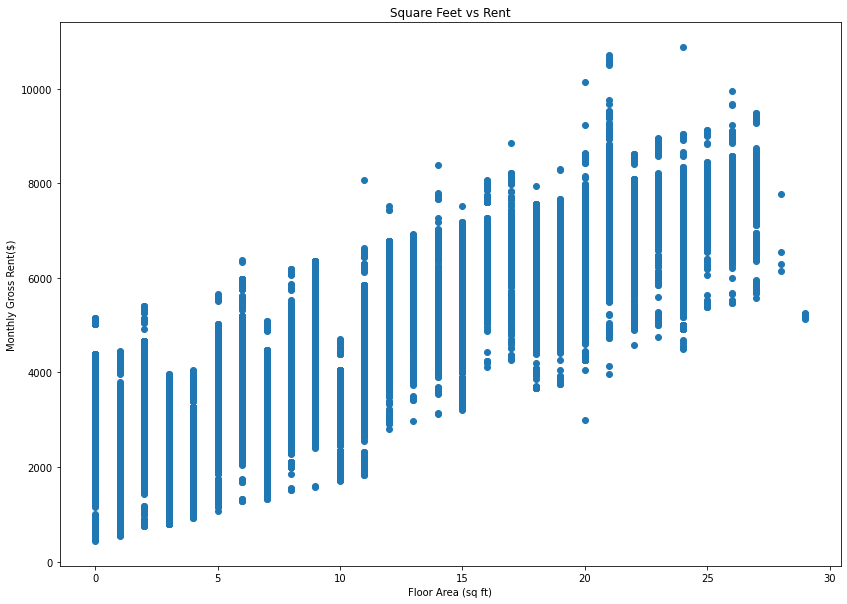

In [128]:
# pyplot.scatter(y_pred_train,X_train[col_floor_area])
# pyplot.title("Price vs Square Feet")
pyplot.figure(figsize=[14, 10])
pyplot.scatter(X_train[col_floor_area], y_pred_train)
pyplot.title("Square Feet vs Rent")
pyplot.xlabel(col_floor_area)
pyplot.ylabel(col_monthly_rent)

In [ ]:
pyplot.figure(figsize=[14, 10])
pyplot.bar(X_train[col_floor_area], y_pred_train)
pyplot.title("Square Feet vs Rent")
pyplot.xlabel(col_floor_area)
pyplot.ylabel(col_monthly_rent)

In [ ]:
pyplot.figure(figsize=[14, 10])
pyplot.scatter(X_train[col_lease_date], y_pred_train)
pyplot.title("Lease Date vs Rent")
pyplot.xlabel(col_lease_date)
pyplot.ylabel(col_monthly_rent)

# pyplot.figure(figsize=[14, 10])
# pyplot.barh(X_train[col_lease_date], y_pred_train)
# pyplot.xlabel(col_monthly_rent)
# pyplot.ylabel(col_lease_date)



Text(0, 0.5, 'Monthly Gross Rent($)')

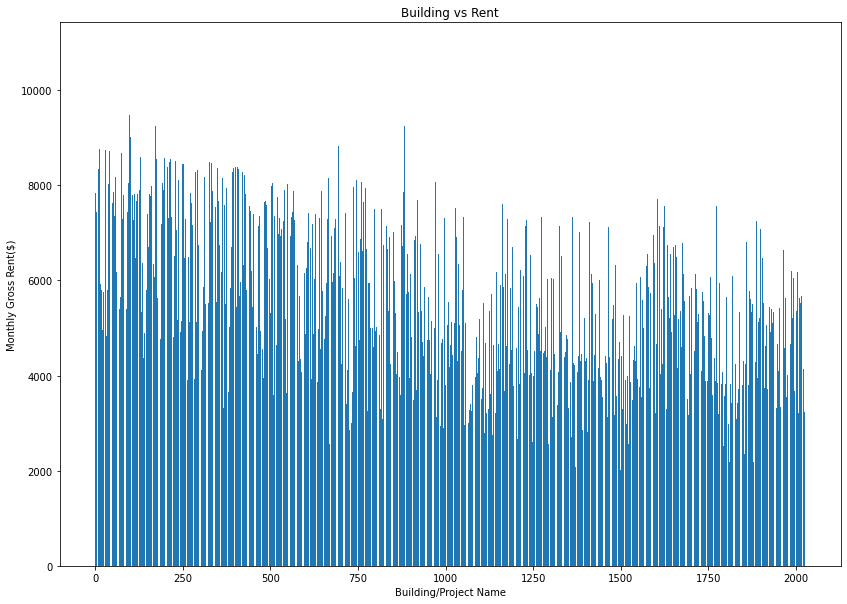

In [52]:
pyplot.figure(figsize=[14, 10])
pyplot.bar(X_train[col_building], y_pred_train)
# This is the location for the annotated text
i = 1.0
j = 2000

# # Annotating the bar plot with the values 
# for i in range(len(X_train[col_lease_date])):
#     plt.annotate(y_pred_train[i], (-0.1 + i, y_pred_train[i] + j))

pyplot.title("Building vs Rent")
pyplot.xlabel(col_building)
pyplot.ylabel(col_monthly_rent)

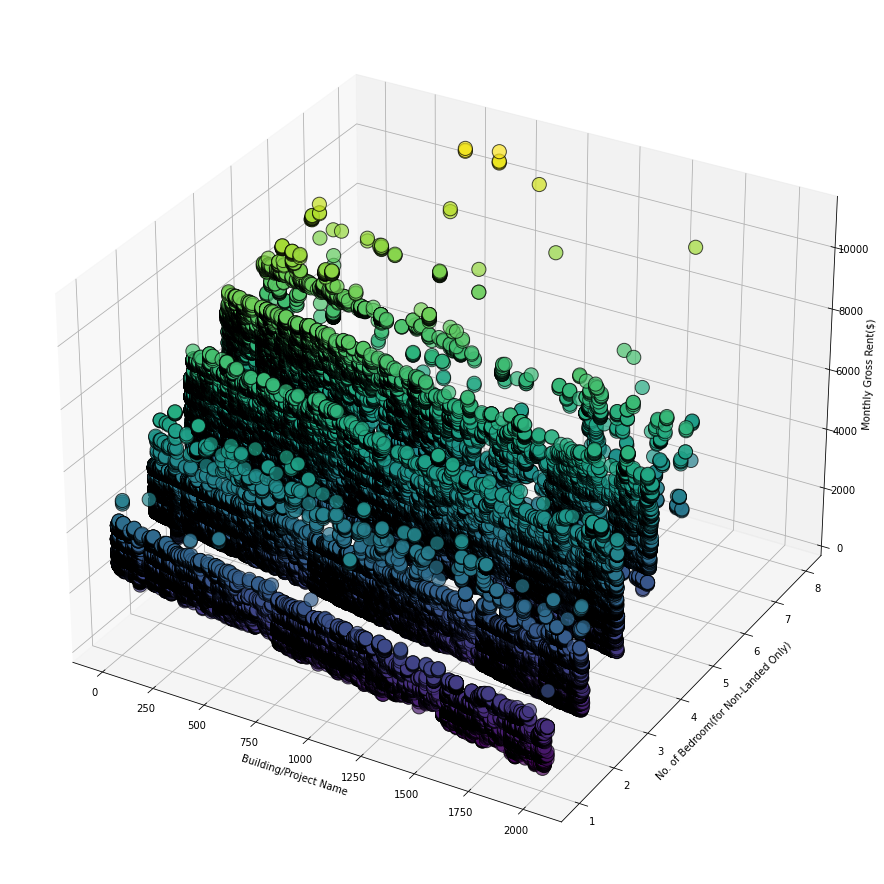

In [35]:
fig = pyplot.figure(figsize=(16, 16))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[col_building], X_train[col_num_bedroom], y_pred_train,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=y_pred_train)
ax.set_xlabel(col_building)
ax.set_ylabel(col_num_bedroom)
ax.set_zlabel(col_monthly_rent)
pyplot.show()

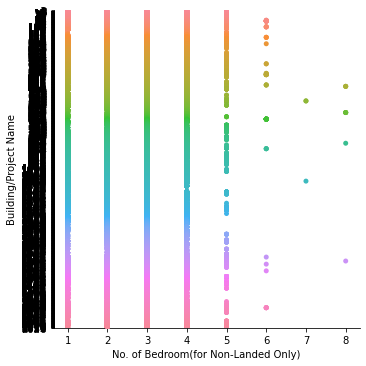

In [26]:
# X_train[col_num_bedroom].value_counts().plot(kind='bar')
# pyplot.title('number of Bedroom')
# pyplot.xlabel('Bedrooms')
# pyplot.ylabel('Count')
# sns.despine